In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

In [2]:
data_set=pd.read_csv("인적사항 인코딩.csv",encoding='cp949')

In [3]:
data_set=data_set.drop('Unnamed: 0',axis=1)

In [4]:
data_set['피해운전자 상해정도']=data_set['피해운전자 상해정도'].map({'상해없음':0,'부상신고':0,'경상':1,'중상':1,'사망':2})

In [6]:
x=data_set.drop('피해운전자 상해정도',axis=1)
y=data_set['피해운전자 상해정도']
#테스트 데이터 셋 확인

<AxesSubplot:>

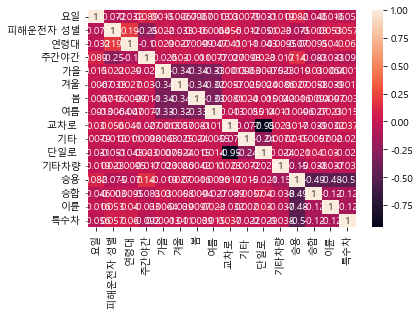

In [7]:
sns.heatmap(x.corr(),annot=True)

In [8]:
x.corr()

,요일,피해운전자 성별,연령대,주간야간,가을,겨울,봄,여름,교차로,기타,단일로,기타차량,승용,승합,이륜,특수차
요일,1.000000,-0.071518,-0.032117,0.089021,0.014725,-0.006704,-0.006745,-0.001339,0.029756,0.007851,-0.031445,-0.019097,0.082434,-0.046445,-0.015837,-0.055813
피해운전자 성별,-0.071518,1.000000,0.188667,-0.253435,0.022495,-0.032939,0.016391,-0.006374,0.056377,-0.012236,-0.051013,0.022620,-0.075281,-0.003000,0.052866,0.057082
연령대,-0.032117,0.188667,1.000000,-0.101526,0.029053,0.026676,-0.009882,-0.046562,0.040659,0.010821,-0.042996,-0.009510,-0.069721,0.009523,0.039908,0.059799
주간야간,0.089021,-0.253435,-0.101526,1.000000,-0.025856,0.030114,-0.011498,0.007660,-0.027083,0.009817,0.023262,-0.016904,0.141085,-0.082633,-0.032809,-0.092232
가을,0.014725,0.022495,0.029053,-0.025856,1.000000,-0.336533,-0.343633,-0.328249,-0.001261,0.006263,-0.000751,-0.023477,-0.018660,0.029903,0.006352,0.000127
겨울,-0.006704,-0.032939,0.026676,0.030114,-0.336533,1.000000,-0.338281,-0.323137,0.005662,-0.025033,0.002397,0.008565,0.026642,0.005794,-0.038693,-0.011142
봄,-0.006745,0.016391,-0.009882,-0.011498,-0.343633,-0.338281,1.000000,-0.329954,0.008126,0.023903,-0.015460,0.004180,0.001579,-0.009428,0.009722,-0.003862
여름,-0.001339,-0.006374,-0.046562,0.007660,-0.328249,-0.323137,-0.329954,1.000000,-0.012762,-0.005499,0.014160,0.011011,-0.009553,-0.026744,0.022758,0.015107
교차로,0.029756,0.056377,0.040659,-0.027083,-0.001261,0.005662,0.008126,-0.012762,1.000000,-0.076971,-0.949106,0.022603,0.016909,-0.039417,-0.031603,0.036796
기타,0.007851,-0.012236,0.010821,0.009817,0.006263,-0.025033,0.023903,-0.005499,-0.076971,1.000000,-0.240968,0.007220,0.015173,-0.005730,0.002018,-0.021526


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']=x.columns
vif=vif.sort_values("VIF FACTOR").reset_index(drop=True)
vif

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF FACTOR,Features
0,1.017951,요일
1,1.049000,연령대
2,1.096648,주간야간
3,1.109959,피해운전자 성별
4,inf,가을
5,inf,겨울
6,inf,봄
7,inf,여름
8,inf,교차로
9,inf,기타


In [10]:
data_set1=data_set[["요일","연령대","주간야간","피해운전자 성별","피해운전자 상해정도"]]
data_set1

,요일,연령대,주간야간,피해운전자 성별,피해운전자 상해정도
0,0,50,1,0.0,1
1,0,70,1,0.0,2
2,0,50,1,0.0,1
3,0,60,0,0.0,1
4,0,80,0,0.0,1
...,...,...,...,...,...
9125,0,70,0,1.0,1
9126,0,50,1,1.0,1
9127,1,30,1,0.0,1
9128,0,50,1,0.0,1


# 불균형 해소 
 클래스 레이블 확인결과 경상 중상이 가장 많아 학습시 과적합이 발생 할 수 있기 때문에 불균형 해소 실시

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#SMOTE 오버샘플링이 한 기법으로 낮은 비율로 존재하는 클래스의 데이터를 최근접 이웃 알고리즘을
#활용하여 새롭게 생성하는 기법

In [12]:
X=data_set1.drop("피해운전자 상해정도",axis=1)
y=data_set1["피해운전자 상해정도"]

In [13]:
X1=data_set.drop("피해운전자 상해정도",axis=1)
y1=data_set1["피해운전자 상해정도"]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [15]:
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [16]:
smote=SMOTE(random_state=42)
X1_smote,y1_smote=smote.fit_resample(X1_train,y1_train)

# 그리드서치

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [18]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='accuracy',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

# 디시젼 트리

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

model, pred = algorithm_pipeline(X1_smote, X1_test, y1_smote, y1_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.7385167632019374
{'max_depth': 25, 'max_leaf_nodes': 200}


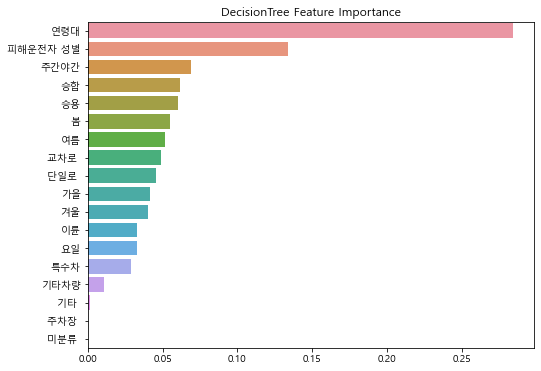

In [20]:
print(model.best_score_)
print(model.best_params_)

ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X1_smote.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('DecisionTree Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [21]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X1_test)

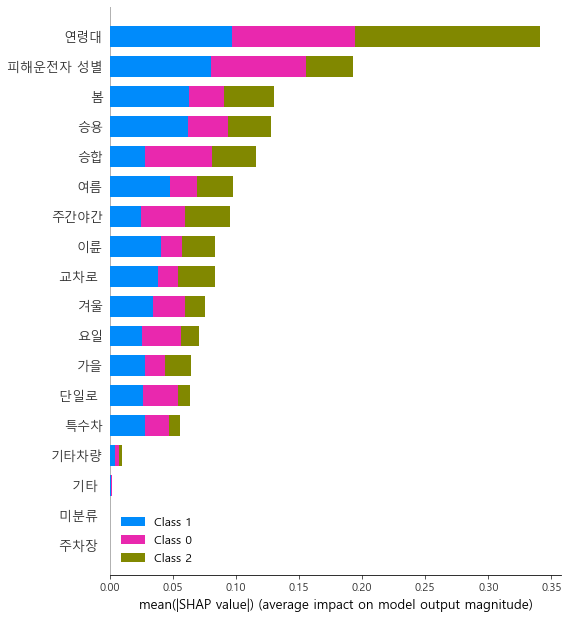

In [22]:
shap.summary_plot(shap_values, X1_test, plot_type="bar")

In [23]:
print(classification_report(y1_test,model.best_estimator_.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.10      0.38      0.15        84
           1       0.92      0.68      0.78      1632
           2       0.14      0.37      0.21       110

    accuracy                           0.65      1826
   macro avg       0.39      0.48      0.38      1826
weighted avg       0.84      0.65      0.72      1826



# XGBoost

In [33]:
import xgboost as xgb

model = xgb.XGBClassifier(booster='gbtree')
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X1_smote, X1_test, y1_smote, y1_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: 

In [ ]:
print(model.best_score_)
print(model.best_params_)
ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X1_smote.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('XGB Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X1_test)

In [ ]:
shap.summary_plot(shap_values, X1_test, plot_type="bar")

In [ ]:
print(classification_report(y1_test,model.best_estimator_.predict(X1_test)))

# LigthGBM

In [24]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(X1_smote, X1_test, y1_smote, y1_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


0.7930764543919049
{'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 200, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.9, 'subsample_freq': 20}


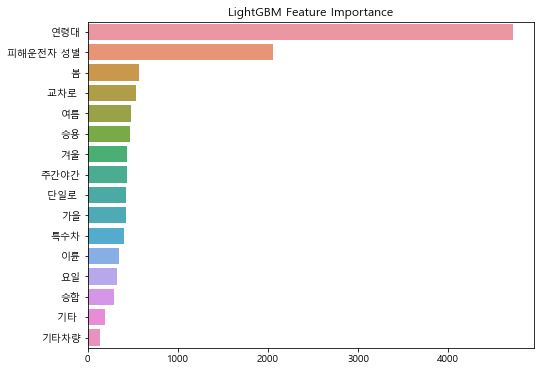

In [29]:
print(model.best_score_)
print(model.best_params_)

ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X1_smote.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('LightGBM Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [30]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X1_test)

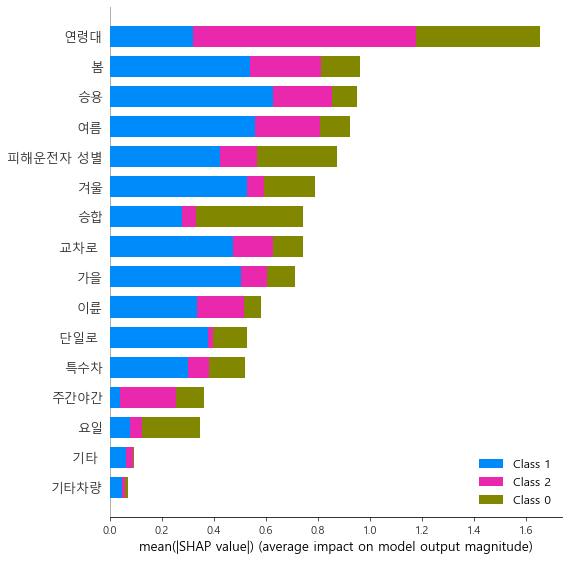

In [31]:
shap.summary_plot(shap_values, X1_test, plot_type="bar")

In [32]:
print(classification_report(y1_test,model.best_estimator_.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.10      0.27      0.15        84
           1       0.92      0.79      0.85      1632
           2       0.17      0.32      0.22       110

    accuracy                           0.74      1826
   macro avg       0.40      0.46      0.41      1826
weighted avg       0.83      0.74      0.78      1826



# RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

model, pred = algorithm_pipeline(X1_smote, X1_test, y1_smote, y1_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


0.796422217766089
{'max_depth': 25, 'max_leaf_nodes': 200, 'n_estimators': 700}


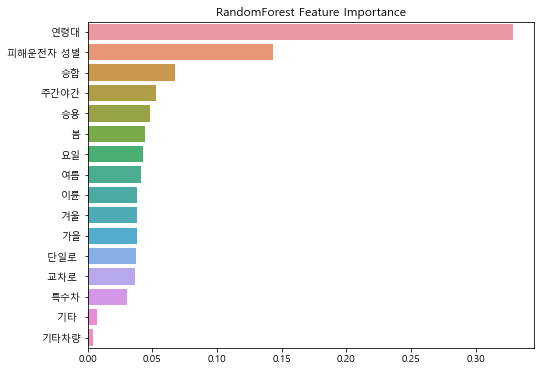

In [20]:
print(model.best_score_)
print(model.best_params_)

ft_importance_values = model.best_estimator_.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X1_smote.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('RandomForest Feature Importance')
sns.barplot(x=ft_series, y=ft_series.index)
plt.show()

In [21]:
import shap
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X1_test)

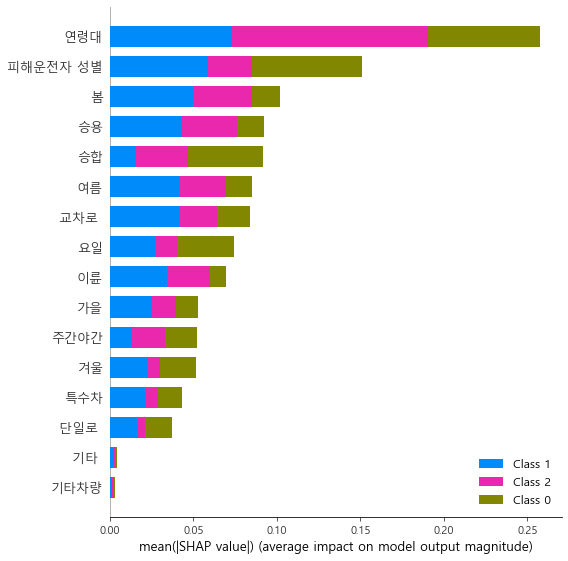

In [22]:
shap.summary_plot(shap_values, X1_test, plot_type="bar")

In [23]:
print(classification_report(y1_test,model.best_estimator_.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.10      0.31      0.15        84
           1       0.92      0.73      0.81      1632
           2       0.16      0.41      0.23       110

    accuracy                           0.69      1826
   macro avg       0.39      0.48      0.40      1826
weighted avg       0.84      0.69      0.75      1826

